Customers Segmentation and Market Basket Analysis using KMeans Clustering Algorithm

In [216]:
#Importing Libraries
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sns
%matplotlib inline

In [217]:
df = pd.read_csv('Mall_Customers.csv') #Importing Dataset

In [218]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [219]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [220]:
df.shape

(200, 5)

In [221]:
print (df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


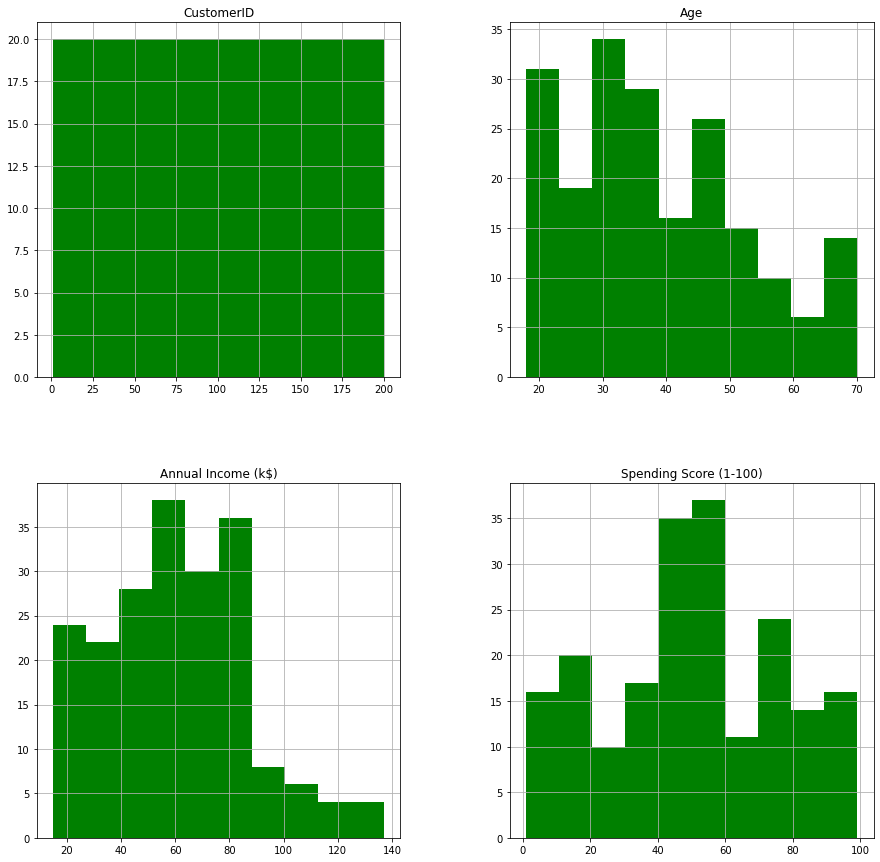

In [222]:
df.hist(figsize = (15, 15), color = 'green')
plt.show()

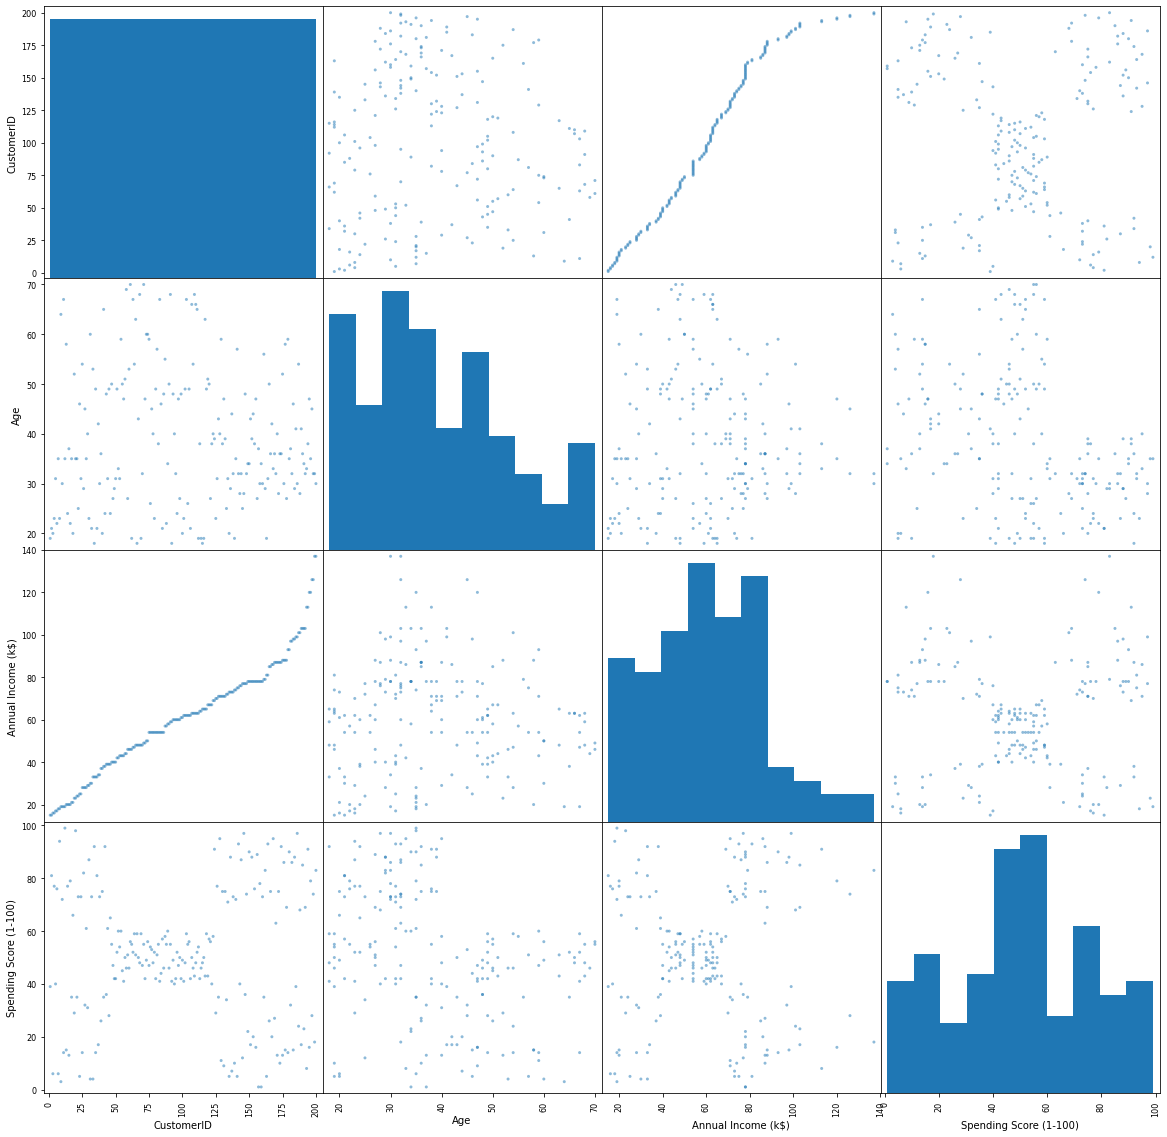

In [223]:
#Scattering the Plot
scatter_matrix(df, figsize = (20, 20))
plt.show()

In [224]:
#Changing Columns Name
df.rename(columns = {'Gender' : 'gender', 'Age' : 'age', 'Annual Income (k$)' : 'income', 'Spending Score (1-100)' : 'score'}, inplace = True)

In [225]:
df #After changing the Columns Name

,CustomerID,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [226]:
df.shape

(200, 5)

In [227]:
df.isnull().sum()

CustomerID    0
gender        0
age           0
income        0
score         0
dtype: int64

In [228]:
#Applying Label Encoding on the Gender Column
le = preprocessing.LabelEncoder()
df['gender'] = le.fit_transform(df.gender.values)

In [229]:
df

,CustomerID,gender,age,income,score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


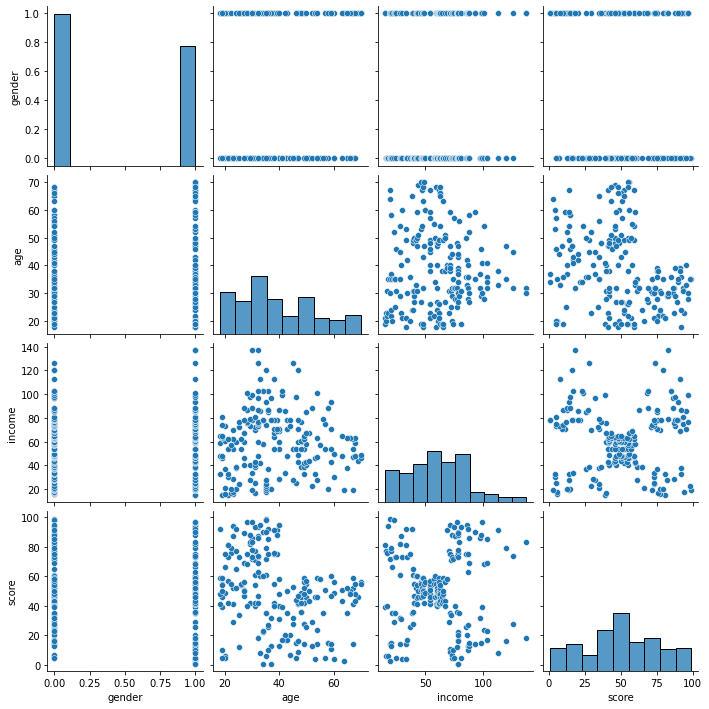

In [230]:
sns.pairplot(df[['gender', 'age', 'income', 'score']]) #Plot Drawing

In [231]:
import sklearn.cluster as cluster

# Cluster Creation with Income and Score

In [232]:
kmeans = cluster.KMeans(n_clusters = 5)

In [233]:
kmeans = kmeans.fit(df[['income', 'score']])

In [234]:
kmeans.cluster_centers_ #Showing the Centroids of each Clusters

array([[55.2962963 , 49.51851852],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636]])

In [235]:
df['income_clusters'] = kmeans.labels_ #Adding new coumn to the dataset for which values are in which columns

In [236]:
df

,CustomerID,gender,age,income,score,income_clusters
0,1,1,19,15,39,1
1,2,1,21,15,81,4
2,3,0,20,16,6,1
3,4,0,23,16,77,4
4,5,0,31,17,40,1
...,...,...,...,...,...,...
195,196,0,35,120,79,3
196,197,0,45,126,28,2
197,198,1,32,126,74,3
198,199,1,32,137,18,2


In [237]:
df['income_clusters'].value_counts() #Showing number of points in each cluster

0    81
3    39
2    35
1    23
4    22
Name: income_clusters, dtype: int64

<AxesSubplot:xlabel='income', ylabel='score'>

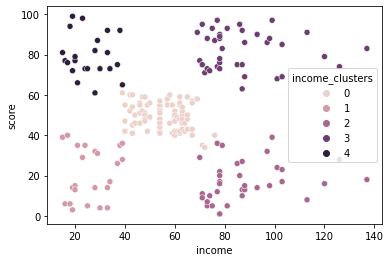

In [238]:
sns.scatterplot(data = df, x = 'income', y = 'score', hue = 'income_clusters')

# Cluster Creation with Age and Score

In [239]:
kmeans = cluster.KMeans(n_clusters = 4)

In [240]:
kmeans = kmeans.fit(df[['age', 'score']])

In [241]:
kmeans.cluster_centers_

array([[43.29166667, 15.02083333],
       [30.1754386 , 82.35087719],
       [55.70833333, 48.22916667],
       [27.61702128, 49.14893617]])

In [242]:
df['age_clusters'] = kmeans.labels_

In [243]:
df

,CustomerID,gender,age,income,score,income_clusters,age_clusters
0,1,1,19,15,39,1,3
1,2,1,21,15,81,4,1
2,3,0,20,16,6,1,0
3,4,0,23,16,77,4,1
4,5,0,31,17,40,1,3
...,...,...,...,...,...,...,...
195,196,0,35,120,79,3,1
196,197,0,45,126,28,2,0
197,198,1,32,126,74,3,1
198,199,1,32,137,18,2,0


In [244]:
df['age_clusters'].value_counts() #Showing number of points in each cluster

1    57
0    48
2    48
3    47
Name: age_clusters, dtype: int64

<AxesSubplot:xlabel='age', ylabel='score'>

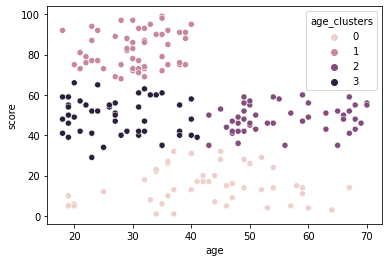

In [245]:
sns.scatterplot(data = df, x = 'age', y = 'score', hue = 'age_clusters')

# Cluster Creation with Gender and Score

In [246]:
kmeans = cluster.KMeans(n_clusters = 2)

In [247]:
kmeans = kmeans.fit(df[['gender', 'score']])

In [248]:
kmeans.cluster_centers_

array([[ 0.43243243, 31.54054054],
       [ 0.4494382 , 73.47191011]])

In [249]:
df['gender_clusters'] = kmeans.labels_

In [250]:
df

,CustomerID,gender,age,income,score,income_clusters,age_clusters,gender_clusters
0,1,1,19,15,39,1,3,0
1,2,1,21,15,81,4,1,1
2,3,0,20,16,6,1,0,0
3,4,0,23,16,77,4,1,1
4,5,0,31,17,40,1,3,0
...,...,...,...,...,...,...,...,...
195,196,0,35,120,79,3,1,1
196,197,0,45,126,28,2,0,0
197,198,1,32,126,74,3,1,1
198,199,1,32,137,18,2,0,0


In [251]:
df['gender_clusters'].value_counts() #Showing number of points in each cluster

0    111
1     89
Name: gender_clusters, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='score'>

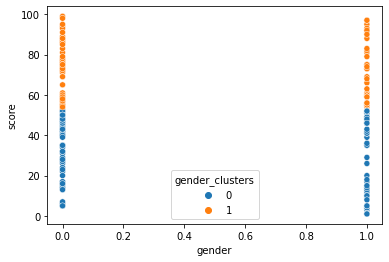

In [252]:
sns.scatterplot(data = df, x = 'gender', y = 'score', hue = 'gender_clusters')

# Finding the number of Clusters for Incomeand Score using Elbow Method

In [253]:
from sklearn.cluster import KMeans

In [254]:
k_range = range(1, 15)

In [255]:
wcss = []

In [256]:
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(df[['income', 'score']])
    wcss.append(km.inertia_)

J:\ML\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [257]:
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30259.657207285458,
 25022.485004530332,
 21818.11458845217,
 19646.482018947245,
 18008.986626451268,
 15836.406160864233,
 14569.295282033563,
 13118.362845525806]

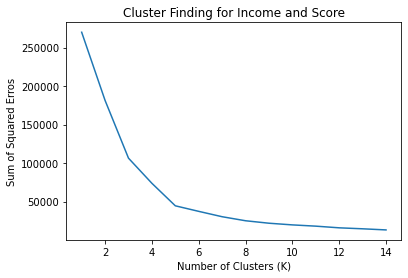

In [258]:
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Erros')
plt.title('Cluster Finding for Income and Score')
plt.plot(k_range, wcss)

# Finding the number of Clusters for Age and Score using Elbow Method

In [266]:
wcss2 = []
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(df[['age', 'score']])
    wcss2.append(km.inertia_)

J:\ML\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [267]:
wcss2

[171535.50000000003, 75949.15601023012, 45840.67661610871, 28165.583566629342]

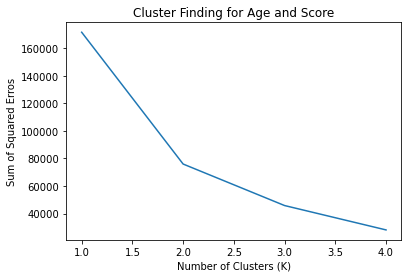

In [268]:
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Erros')
plt.title('Cluster Finding for Age and Score')
plt.plot(k_range, wcss2)

# Finding the number of Clusters for Gender and Score using Elbow Method

In [269]:
wcss3 = []
k_range = range(1, 5)
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(df[['gender', 'score']])
    wcss3.append(km.inertia_)

J:\ML\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [263]:
wcss3

[132753.28, 45905.0130580018, 13943.83315828088, 8995.737667289139]

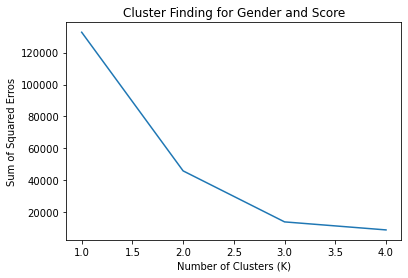

In [270]:
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Erros')
plt.title('Cluster Finding for Gender and Score')
plt.plot(k_range, wcss3)